<a id='toc'></a>

# Table of Contents

<ul>
    <li><a href='#section_0'>Section 0: Introduction</a></li>
    <li><a href='#section_1'>Section 1: Data Loading</a></li>
    <li><a href='#section_2'>Section 2: Data Preprocessing</a></li>
    <li><a href='#section_3'>Section 3: Exploratory Data Analysis</a></li>
    <li><a href='#section_4'>Section 4: Regional Profiles</a></li>
    <li><a href='#section_5'>Section 5: Hypothesis Testing</a></li>
    <li><a href='#section_6'>Section 6: Conclusion</a></li>
</ul>

<a id='section_0'></a>

# Section 0: Introduction
<a href='#section_1'>[Skip to Data Loading]</a>

The only way to beat the raging fire that is Steam is not by fighting fire with fire, but rather by fighting fire with Ice &#174;!

Our Mission:

- Scour the user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales available from open sources. 
- Identify patterns that determine whether a game succeeds or not.
- Help plan for the upcoming year's marketing strategy.

<a id='section_1'></a>

# Section 1: Data Loading
<a href='#section_2'>[Skip to Data Preprocessing]</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html
from scipy import stats as st
import sys
import warnings

if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option("display.precision", 2)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
try:
    games_data = pd.read_csv('dataset/games.csv')
except:
    games_data = pd.read_csv('/datasets/games.csv')
    
display(games_data.head(10))
display(games_data.describe())
display(games_data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Notes

Need to change:

- column titles to miniscule for consistency
- year_released to int
- user_score to float
    
Need to consider:

- The missing data from:
    - name
    - year_of_release
    - genre
    - critic_score
    - user_score
    - rating

<a id='section_2'></a>

# Section 2: Data Preprocessing
<a href='#section_3'>[Skip to Exploratory Data Analysis]</a>

In [3]:
# change column names
games_data = games_data.rename(columns=str.lower)
for title in games_data.columns:
    assert(title.islower())

In [4]:
# delete missing data that forms less than 10% of dataset
games_data = games_data.dropna(subset=["name", "year_of_release", "genre"]).reset_index()

print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB
None


In [5]:
# determine number of duplicates
print("Number of duplicate entries: ", games_data.duplicated().sum())

Number of duplicate entries:  0


In [6]:
# determine what to do with missing data that comprises more than 10% of dataset
missing_scores = games_data.query("critic_score.isna() & user_score.isna() & rating.isna()")
print("Have all ratings missing:", len(missing_scores))

Have all ratings missing: 6534


### Notes

We note that a large portion of the data missing ratings is missing all three types of ratings: critic, user, ESRB.
    
- These are likely missing because the game had a low marketing budget and did not generate enough attention to get a rating

Of these, we want to see how many were high sellers, but to do this we need to determine what a high seller is.

In [7]:
print("Sales data distribution summaries:")
sales_data = {"na_sales":games_data["na_sales"].describe(), "eu_sales":games_data["eu_sales"].describe(), 
             "jp_sales":games_data["jp_sales"].describe(), "other_sales":games_data["other_sales"].describe()}
games_data_sales = pd.DataFrame(sales_data)
display(games_data_sales)

Sales data distribution summaries:


,na_sales,eu_sales,jp_sales,other_sales
count,16444.00,16444.00,16444.00,16444.00
mean,0.26,0.15,0.08,0.05
std,0.82,0.51,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


### Notes

It appears that there is a rather low threshold to be considered a high seller (when considering the top 75% of sales), but that the max is always several orders of magnitude beyond that.

Given that the lowest top seller from each category was at least 10 million USD, we can reasonably use 5 million USD as a threshold for determining whether or not a game was highly successful and 1 million USD as a lower bound.

It is also noteworthy that the minimum value for all regions is 0 USD. Their marketing must have been terrible to pull in that kind of profit. More likely is the following scenarios:
- The column is measured in millions of USD and accurate to two decimal places, implying that a game could have made 9,999 USD and still be considered 0 USD on this scale.
- The game was banned/forbidden in a given region and thus, really did generate 0 USD in revenue

As such, we will retain the 0 USD value.

In [8]:
print("MILLIONS OF USD MADE FOR THOSE MISSING ALL THREE RATINGS:")
threshold = 1
for _ in range(5):
    missing_scores_hi_sales = missing_scores.query("na_sales>@threshold | eu_sales>@threshold \
                                           | jp_sales>@threshold | other_sales>@threshold")
    print(f"Made over {threshold} million USD in any market: {len(missing_scores_hi_sales)}"+
            f" / {len(missing_scores)} = {len(missing_scores_hi_sales)/len(missing_scores):.5f}")
    threshold += 1
    
print("\nMILLIONS OF USD MADE FOR THE ORIGINAL DATA SET:")
threshold = 1
for _ in range(5):
    hi_sales = games_data.query("na_sales>@threshold | eu_sales>@threshold \
                                           | jp_sales>@threshold | other_sales>@threshold")
    print(f"Made over {threshold} million USD in any market: {len(hi_sales)}"+
            f" / {len(games_data)} = {len(hi_sales)/len(games_data):.5f}")
    threshold += 1


MILLIONS OF USD MADE FOR THOSE MISSING ALL THREE RATINGS:
Made over 1 million USD in any market: 398 / 6534 = 0.06091
Made over 2 million USD in any market: 127 / 6534 = 0.01944
Made over 3 million USD in any market: 61 / 6534 = 0.00934
Made over 4 million USD in any market: 36 / 6534 = 0.00551
Made over 5 million USD in any market: 24 / 6534 = 0.00367

MILLIONS OF USD MADE FOR THE ORIGINAL DATA SET:
Made over 1 million USD in any market: 1145 / 16444 = 0.06963
Made over 2 million USD in any market: 398 / 16444 = 0.02420
Made over 3 million USD in any market: 179 / 16444 = 0.01089
Made over 4 million USD in any market: 105 / 16444 = 0.00639
Made over 5 million USD in any market: 70 / 16444 = 0.00426


### Notes

A little more than 5% of the games made over 1 million USD in any market, but that number drops to around 2% when the threshold increases to 2 million USD, and eventually dwindles to 0.4% as it reaches 5 million.

This patterns nicely with the original data, meaning it is a representative sample and its removal would likely not affect the overall dataset.

But it would be best if we could fill in the missing data somehow. Perhaps examining its relationship with other variables.

In [9]:
# scale critic_score to a 10-scale to match user_score
print(f"Minimum value for critic_score: {games_data['critic_score'].min()}")
games_data["critic_score"] = games_data["critic_score"].apply(lambda x: x/10 if x > 10 else x) 
for x in games_data["critic_score"]:
    assert((x <= 10 and x >= 1) or np.isnan(x))

Minimum value for critic_score: 13.0


In [10]:
# change user_score data type to numeric, force tbd -> NaN
games_data["user_score"] = pd.to_numeric(games_data["user_score"], errors="coerce")
for x in games_data["user_score"]:
    assert(type(x) == float)

In [11]:
# determine how strongly correlated user & critic scores and revenue are
scores = pd.DataFrame({"critic_score":games_data["critic_score"], "user_score":games_data["user_score"], 
                       "tot_rev":(games_data["na_sales"]+games_data["eu_sales"]+games_data["jp_sales"]+games_data["other_sales"])})
scores.dropna(inplace=True)
scores["abs_difference"] = abs(scores["critic_score"]-scores["user_score"])
display(scores.corr())

,critic_score,user_score,tot_rev,abs_difference
critic_score,1.00,0.58,2.37e-01,-2.67e-01
user_score,0.58,1.00,8.84e-02,-2.44e-01
tot_rev,0.24,0.09,1.00e+00,-9.99e-03
abs_difference,-0.27,-0.24,-9.99e-03,1.00e+00


### Notes

We treated tbd in user_score as NaN and coerced conversion when converting to float data type.

Both critic_score and user_score have a strong positive correlation, but the tot_rev is only weakly correlated with either. 

In [12]:
print("Number of games with critic_score XOR user_score:", \
      len(games_data.query("(critic_score.isna() | user_score.isna()) & ~(critic_score.isna() & user_score.isna())")))

Number of games with critic_score XOR user_score: 1658


### Notes

But we see that a mere 10% of the data could be filled in this way.

However, as our goal is to predict which games will succeed in the coming year, perhaps we should keep in mind that modern trends determine modern profits and ditch data older than a decade. Perhaps we can likewise ditch much of the missing data in this way.

In [13]:
# Add a column with total rev for each game in data
games_data["total_revenue"] = games_data["na_sales"] + games_data["eu_sales"]+ \
                                    games_data["jp_sales"] + games_data["other_sales"]

In [14]:
# how much data is older than a decade and missing fields
def fill_missing_score(row):
    if np.isnan(row["critic_score"]):
        row["critic_score"] = row["user_score"]
    elif np.isnan(row["user_score"]):
        row["user_score"] = row["critic_score"]
    return row

recent_games_data = games_data.query("year_of_release > 2006")

orig_len = len(recent_games_data)
either_missing_len = len(recent_games_data.query('(critic_score.isna() | user_score.isna())'))
xor_missing_len =len(recent_games_data.query('(critic_score.isna() | user_score.isna()) \
        & ~(critic_score.isna() & user_score.isna())'))
final_len = orig_len - either_missing_len + xor_missing_len

print(f"Total data of recent games (<10 years old): {orig_len}")
print(f"Total data of games missing either score: {either_missing_len}")
print(f"Total data of games missing XOR scores: {xor_missing_len}")
print(f"Total expected data of recent games (clean): {final_len}")

recent_games_data = recent_games_data.dropna(how="all", subset=["critic_score", "user_score"])
recent_games_data = recent_games_data.apply(fill_missing_score, axis=1)

assert(len(recent_games_data) == final_len)
for x, y in zip(recent_games_data["critic_score"], recent_games_data["user_score"]):
    assert(np.isnan(x) == False and np.isnan(y) == False)

Total data of recent games (<10 years old): 9327
Total data of games missing either score: 5394
Total data of games missing XOR scores: 907
Total expected data of recent games (clean): 4840


In [15]:
# drop few remaining null ratings
recent_games_data = recent_games_data.dropna().reset_index()
recent_games_data = recent_games_data.drop(["level_0", "index"], axis=1)

In [16]:
# change year_of_release to int
recent_games_data["year_of_release"] = recent_games_data["year_of_release"].astype("int")

for x in recent_games_data["year_of_release"]:
    assert(type(x) == int)

In [17]:
# print info for cleaned dataset
display(recent_games_data.head())
display(recent_games_data.describe())
print(recent_games_data.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.7,8.4,E,28.32
3,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,8.0,7.7,E,22.70
4,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,6.1,6.3,E,21.82


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_revenue
count,4756.00,4756.00,4756.00,4756.00,4756.00,4756.00,4756.0,4756.00
mean,2010.39,0.36,0.23,0.05,0.09,6.80,6.7,0.73
std,2.73,0.83,0.59,0.23,0.20,1.48,1.5,1.65
min,2007.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01
25%,2008.00,0.05,0.01,0.00,0.01,5.90,5.9,0.11
50%,2010.00,0.14,0.06,0.00,0.03,7.00,7.0,0.28
75%,2012.00,0.35,0.23,0.02,0.08,7.90,7.8,0.73
max,2016.00,15.68,12.76,4.70,3.96,9.80,9.5,35.52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4756 non-null   object 
 1   platform         4756 non-null   object 
 2   year_of_release  4756 non-null   int32  
 3   genre            4756 non-null   object 
 4   na_sales         4756 non-null   float64
 5   eu_sales         4756 non-null   float64
 6   jp_sales         4756 non-null   float64
 7   other_sales      4756 non-null   float64
 8   critic_score     4756 non-null   float64
 9   user_score       4756 non-null   float64
 10  rating           4756 non-null   object 
 11  total_revenue    4756 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 427.4+ KB
None


### Conclusion

We changed the column titles to all lowercase for consistency.

We first deleted 271 entries involving missing data from name, year_of_release, and genre categories, which accounted for a mere 1.62% of the data (their presence will not be missed).

We searched for duplicate data, and thankfully, came up empty handed.

We also changed the critic_score to a 10-scale to be comparable to the user_score and changed the user_score data type to float.

We filtered out data too antiquated to be relevant to the current task (of determining the champion of tomorrow, not the champion of yesteryear). And filled in the missing score when possible with the corresponding user/critic score. This approach may have caused problems if there were a weaker correlation between the two.

We then added a column with the total revenue generated by each of the remaining games.

Finally, we changed the year_of_release data type to int.

Now it's time to see which categories our cashcows belong to.

<a id='section_3'></a>

## Section 3: Exploratory Data Analysis
<a href='#section_4'>[Skip to Regional Profiles]</a>

In [18]:
# Look at how many games were released in different years. Is the data for every period significant?
recent_games_data["year_of_release"].value_counts()

2008    775
2007    730
2009    704
2010    533
2011    521
2012    331
2014    329
2013    299
2015    283
2016    251
Name: year_of_release, dtype: int64

### Notes

As we already restricted the data to the last ten years, we have already pruned the irrelevant data.

However, it is interesting to note that the number of games released between 2008 and 2016 decreased by a factor of 3.

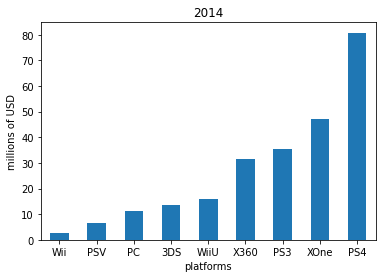

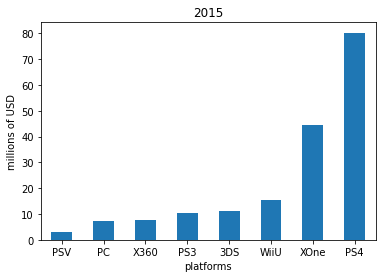

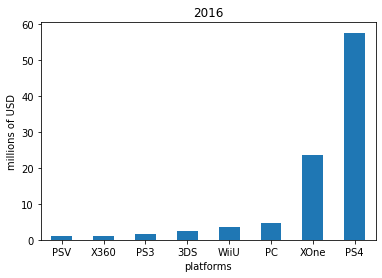

In [19]:
# Look at how sales varied from platform to platform.
recent_games_data = recent_games_data.query("year_of_release >= 2014")

sales = pd.DataFrame(pd.pivot_table(recent_games_data, values=["total_revenue"],\
                                    columns=["year_of_release", "platform"], \
                                    aggfunc="sum").T.sort_values(by="total_revenue"))

for year in range(2014,2017):
    sub_table = sales.query("year_of_release==@year")
    sub_table.plot(kind="bar", rot=0, legend=False)
    plt.title(year)
    plt.ylabel("millions of USD")
    plt.xlabel("platforms")
    plt.xticks(ticks=np.arange(len(sub_table.index.get_level_values(1))),labels=(sub_table.index.get_level_values(1)))

plt.show()


### Notes

Reigning Champions:
- 2014-2016
    - 1st - PS4
    - 2nd - XOne
    - 3rd - PS3->WiiU-PC
    
"Which platforms are leading in sales?"
- PS4 and XOne are the current leaders

"Which ones are growing or shrinking?"
- Both PS4 and XOne are younger (3 years old) and are still likely to grow
- PS3 and X360 are very much on their last legs; as are WiiU and 3DS

"Select several potentially profitable platforms."
- I hear that Nintendo will release a new platform called the Switch in March, 2017; that's one to look out for.
- I also imagine PC gaming will experience a huge uptick.
- However, given the data we have in front of us, PS4 and XOne look like the safest bets.

In [20]:
# Choose the platforms with the greatest total number of games
#NINTENDO
nintendo_num_games = recent_games_data.query("platform == 'Wii' | platform == 'WiiU' |"+
                                         " platform == 'DS' | platform == '3DS' |"+
                                         " platform == 'GC' | platform == 'GBA'")
nintendo_num_games = nintendo_num_games.groupby(["year_of_release", "platform"]).size().reset_index() \
            .groupby(["year_of_release", "platform"])[[0]].max()
nintendo_num_games = nintendo_num_games.rename(columns={0:"Nintendo"})

#SONY
sony_num_games = recent_games_data.query("platform == 'PSV' | platform == 'PS2' |"+
                                     " platform == 'PS3' | platform == 'PS4' |"+
                                     " platform == 'PSP'")
sony_num_games = sony_num_games.groupby(["year_of_release", "platform"]).size().reset_index() \
            .groupby(["year_of_release", "platform"])[[0]].max()
sony_num_games = sony_num_games.rename(columns={0:"Sony"})

#MICROSOFT
microsoft_num_games = recent_games_data.query("platform == 'X360' | platform == 'XOne' |"+
                                         " platform == 'XB'")
microsoft_num_games = microsoft_num_games.groupby(["year_of_release", "platform"]).size().reset_index() \
            .groupby(["year_of_release", "platform"])[[0]].max()
microsoft_num_games = microsoft_num_games.rename(columns={0:"Microsoft"})

#PC
pc_num_games = recent_games_data.query("platform == 'PC'")
pc_num_games = pc_num_games.groupby(["year_of_release", "platform"]).size().reset_index() \
            .groupby(["year_of_release", "platform"])[[0]].max()
pc_num_games = pc_num_games.rename(columns={0:"PC"})

display_side_by_side(nintendo_num_games, sony_num_games, microsoft_num_games, pc_num_games)

Nintendo 
 
 
 year_of_release 
 platform 
 
 
 
 
 
 2014 
 3DS 
 26 
 
 
 Wii 
 2 
 
 
 WiiU 
 19 
 
 
 2015 
 3DS 
 21 
 
 
 WiiU 
 20 
 
 
 2016 
 3DS 
 12 
 
 
 WiiU 
 10 
 
 
 
 
 
 
 
 Sony 
 
 
 year_of_release 
 platform 
 
 
 
 
 
 2014 
 PS3 
 61 
 
 
 PS4 
 51 
 
 
 PSV 
 37 
 
 
 2015 
 PS3 
 24 
 
 
 PS4 
 84 
 
 
 PSV 
 24 
 
 
 2016 
 PS3 
 9 
 
 
 PS4 
 98 
 
 
 PSV 
 13 
 
 
 
 
 
 
 
 Microsoft 
 
 
 year_of_release 
 platform 
 
 
 
 
 
 2014 
 X360 
 52 
 
 
 XOne 
 44 
 
 
 2015 
 X360 
 22 
 
 
 XOne 
 52 
 
 
 2016 
 X360 
 7 
 
 
 XOne 
 65 
 
 
 
 
 
 
 
 PC 
 
 
 year_of_release 
 platform 
 
 
 
 
 
 2014 
 PC 
 37 
 
 
 2015 
 PC 
 36 
 
 
 2016 
 PC 
 37

### Notes

The passing of the torch takes a few years when a new console comes out, but when it does, it always eventually outperforms its predecessor.

- For example, the Wii was replaced by the WiiU in terms of games immediately. But PS4 took 2 years to outshine PS3 in terms of games; same with X360 and XOne.

The lifespan of a modern console is rather lengthy (which makes sense, as designing and building new hardware is costly for the companies), but their prime (production of over 50 games a year) is significantly shorter.

- Lifespan can stretch into the decades, but prime is typically in the range of 1-5 years
    - 3DS only had one peak year
    - Wii had four peak years
- Notable long-lasting platforms include:
    - PS3, which came out in 2006 and had more than 50 games per annum even as late as 2014
    - X360, which came out in 2005 and had more than 50 games per annum even as late as 2014
    
A Word on Nintendo:

- Nintendo's hardware market has taken a significant blow and is struggling to survive. It needs a new platform if it wishes to remain competitive

ALL HISTORICAL DATA


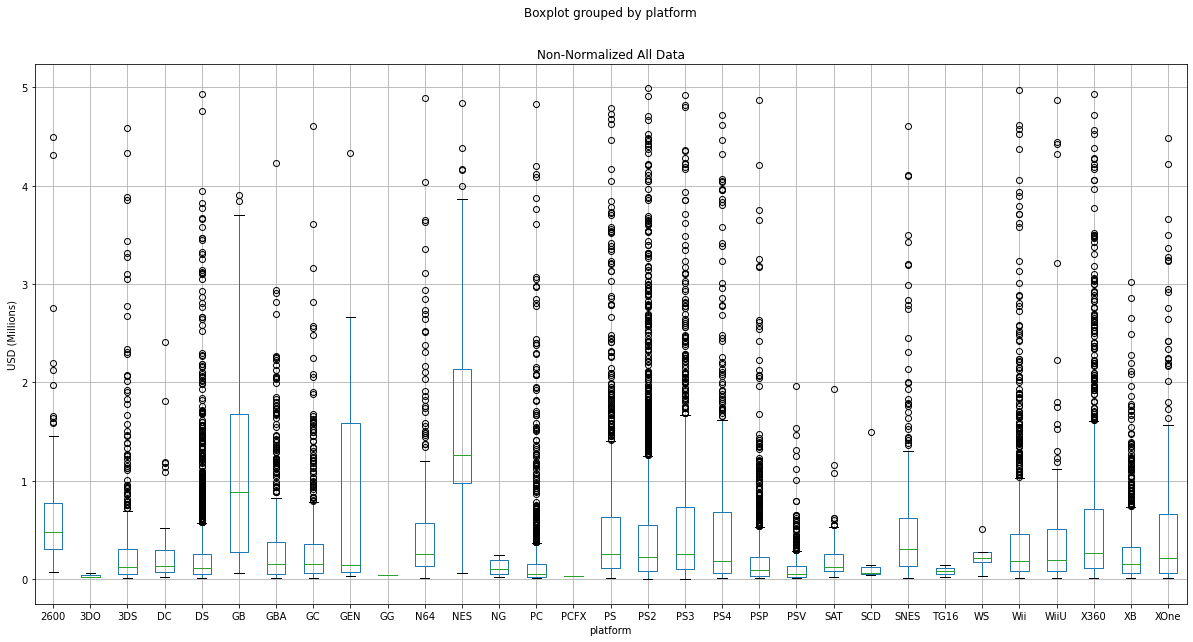

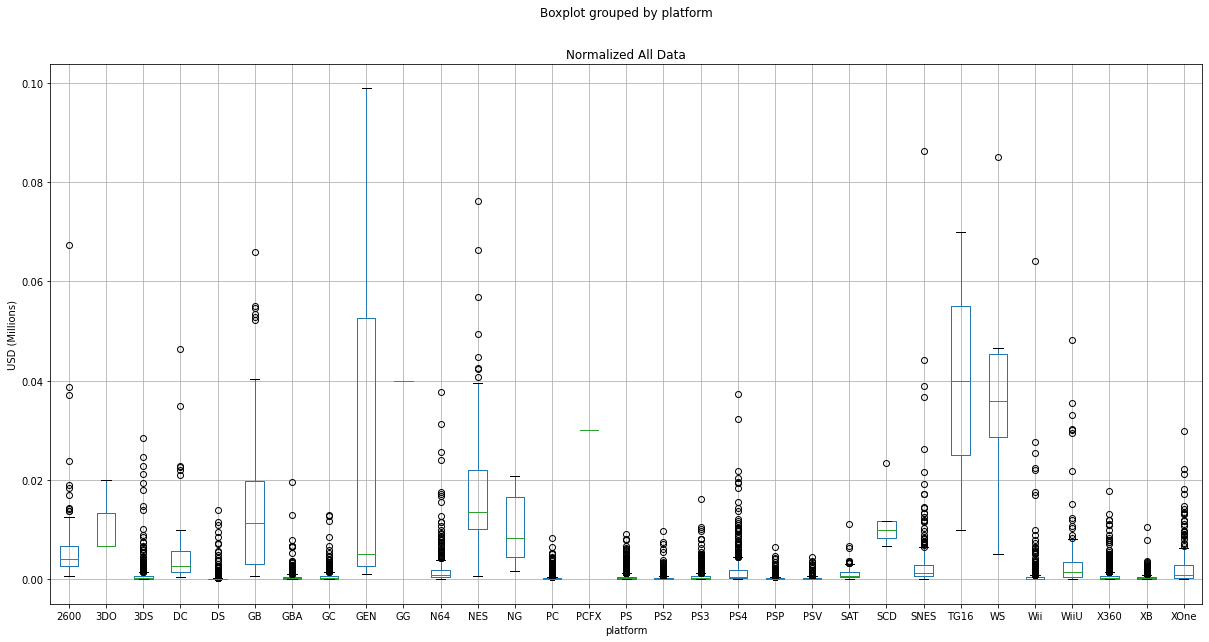

In [21]:
# Build a box plot for the global sales of all games, broken down by platform.
def normalize(dataset):
    platform_num_games = {}
    for index, row in dataset.iterrows():
        try:
            platform_num_games[row["platform"]] += 1
        except:
            platform_num_games[row["platform"]] = 1
    
    normalized_revenue = dataset.copy(deep=True)
    for index, row in normalized_revenue.iterrows():
        normalized_revenue.loc[index,"total_revenue"] /= platform_num_games[row["platform"]]
        
    return normalized_revenue

print("ALL HISTORICAL DATA")
# Historical
games_data.query("total_revenue < 5").boxplot(column="total_revenue", by="platform", figsize=(20,10))
plt.title("Non-Normalized All Data")
plt.ylabel("USD (Millions)")
plt.show()

normalized_revenue_all = normalize(games_data)
normalized_revenue_all.query("total_revenue <= 0.1").boxplot(column="total_revenue", by="platform", figsize=(20,10))
plt.title("Normalized All Data")
plt.ylabel("USD (Millions)")
plt.show()

### Notes

NOTE: We removed outliers (total_revenue >= 5 million USD; our previous threshold for runaway financial success), but this will not greatly affect the median; and for the normalized data, we removed outliers (far fewer in number) starting at a threshold of 0.1 million USD

"Are the differences in sales significant?"
- There are significant differences:
    - When we normalize the revenue, we see that older consoles actually performed better than modern consoles

"What about average sales on various platforms?"
- The median for most platforms tends to hover rather low (in the sub-million range), but GB and NES stand above the rest (too bad they're long-dead platforms)

RECENT DATA ONLY


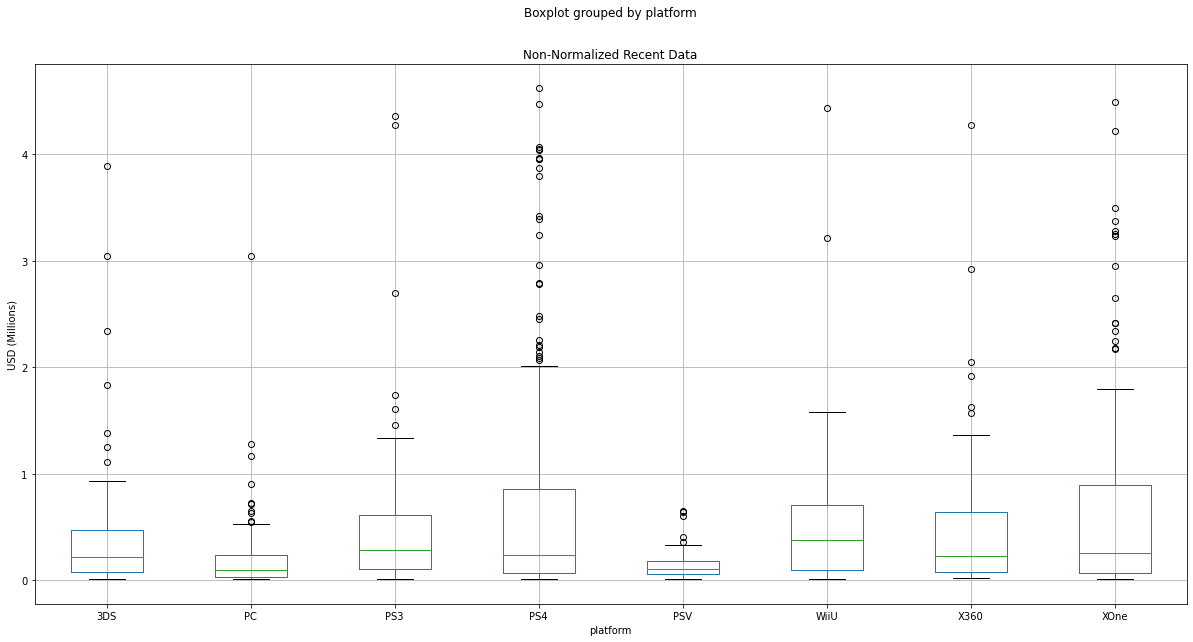

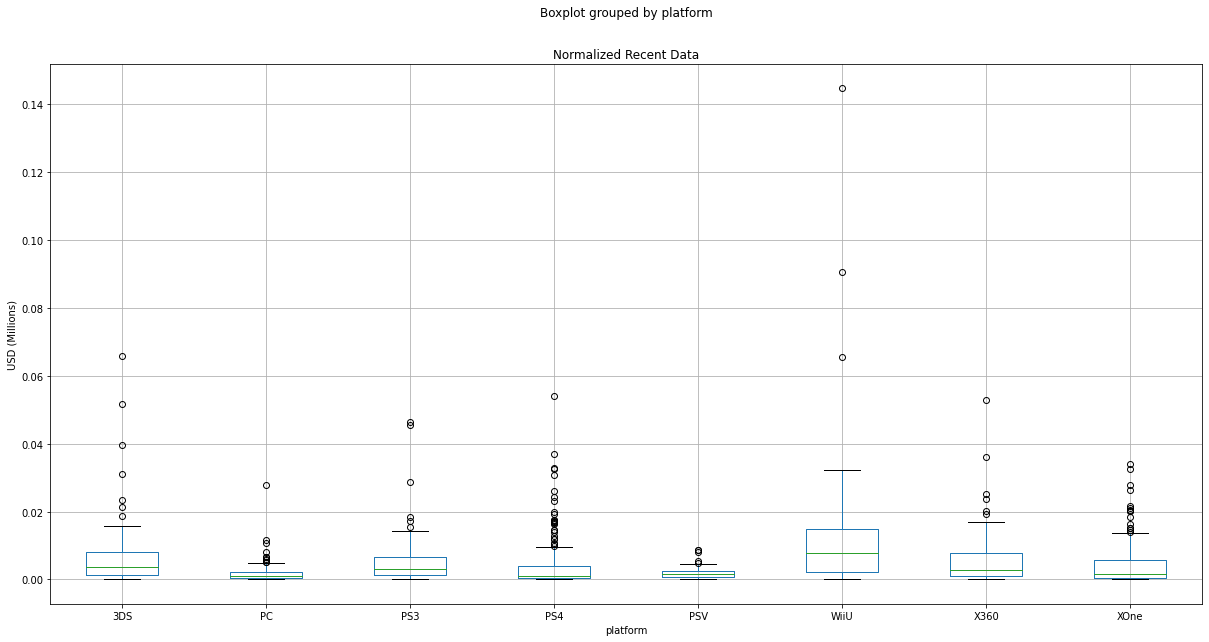

In [22]:
# Delete platforms with < 5 games as it throws of normalization
games_to_keep = [platform
                 for platform, count \
                 in zip(recent_games_data["platform"].value_counts().index, recent_games_data["platform"].value_counts())
                 if count > 5]

tmp_recent = recent_games_data[recent_games_data["platform"].isin(games_to_keep)]

print("RECENT DATA ONLY")
tmp_recent.query("total_revenue <= 5").boxplot(column="total_revenue", by="platform", figsize=(20,10))
plt.title("Non-Normalized Recent Data")
plt.ylabel("USD (Millions)")
plt.show()

normalized_revenue_recent = normalize(tmp_recent)
normalized_revenue_recent.boxplot(column="total_revenue", by="platform", figsize=(20,10))
plt.title("Normalized Recent Data")
plt.ylabel("USD (Millions)")
plt.show()

### Notes

NOTE: We deleted the only platform with less than 5 games (the Wii) as it really threw off the scaling; we can do this because 2 games are not enough to draw any useful conclusions from and in this case, they really distract as there were 2 games produced for the Wii in 2014, but 0 games in both 2015 & 2016, despite the great popularity of the the two games published

"Are the differences in sales significant?"
- There are significant differences:
    - When we normalize the revenue, we see that leaders PS4 and XOne underperform compared to WiiU (guess Nintendo games are a safer bet in aggregate, possibly because of their broader market appeal)

"What about average sales on various platforms?"
- The median for all platforms tends to hover rather low (in the sub-million range)

In [23]:
# Take a look at how user and professional reviews affect sales. 
# Build a scatter plot and calculate the correlation between reviews and sales. 
def platform_data(platform):
    data = [row 
            for index, row in recent_games_data.iterrows() 
            if row["platform"] == platform]

    data = pd.DataFrame(data)

    for index, row in data.iterrows():
        assert(row["platform"] == platform)

    return data

Text(0, 0.5, 'total_revenue')

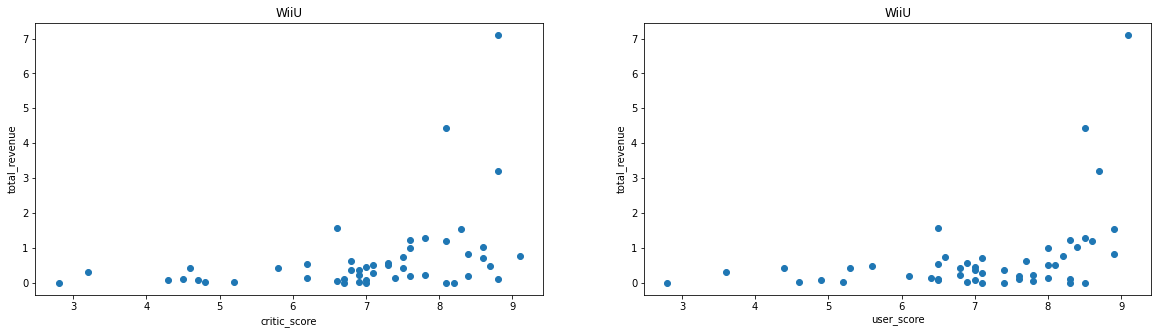

In [24]:
# WiiU
WiiU_data = platform_data("WiiU")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].scatter(WiiU_data["critic_score"], WiiU_data["total_revenue"])
axes[0].title.set_text("WiiU")
axes[0].set_xlabel("critic_score")
axes[0].set_ylabel("total_revenue")
axes[1].scatter(WiiU_data["user_score"], WiiU_data["total_revenue"])
axes[1].title.set_text("WiiU")
axes[1].set_xlabel("user_score")
axes[1].set_ylabel("total_revenue")

Text(0, 0.5, 'total_revenue')

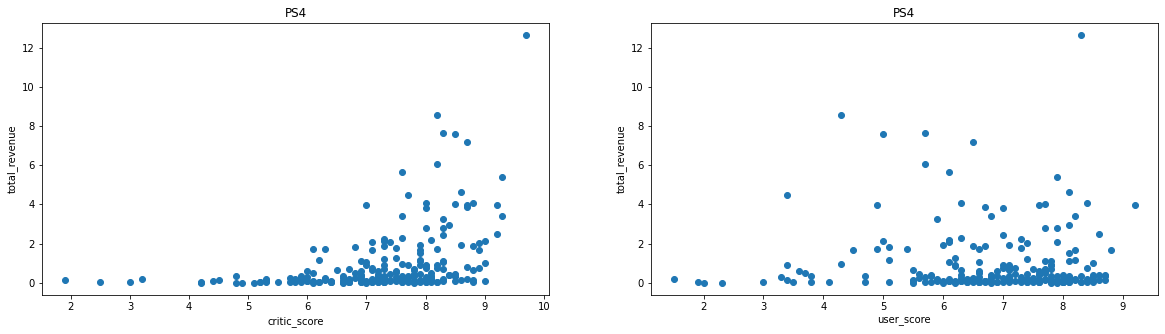

In [25]:
# PS4
PS4_data = platform_data("PS4")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].scatter(PS4_data["critic_score"], PS4_data["total_revenue"])
axes[0].title.set_text("PS4")
axes[0].set_xlabel("critic_score")
axes[0].set_ylabel("total_revenue")
axes[1].scatter(PS4_data["user_score"], PS4_data["total_revenue"])
axes[1].title.set_text("PS4")
axes[1].set_xlabel("user_score")
axes[1].set_ylabel("total_revenue")

Text(0, 0.5, 'total_revenue')

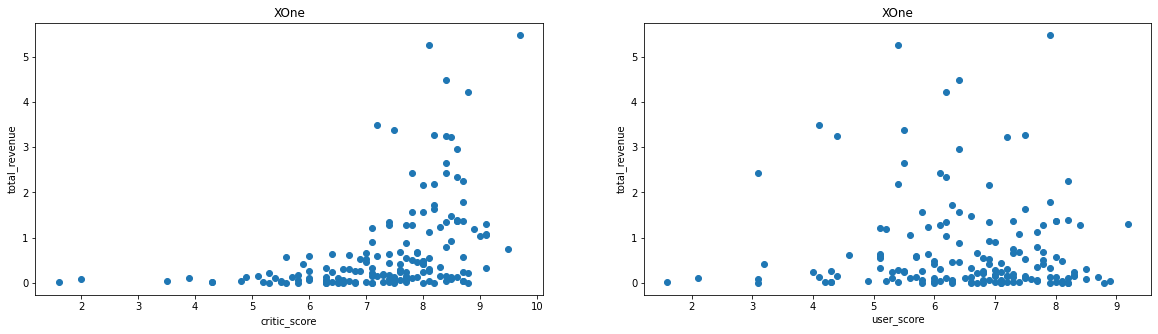

In [26]:
# XOne
XOne_data = platform_data("XOne")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].scatter(XOne_data["critic_score"], XOne_data["total_revenue"])
axes[0].title.set_text("XOne")
axes[0].set_xlabel("critic_score")
axes[0].set_ylabel("total_revenue")
axes[1].scatter(XOne_data["user_score"], XOne_data["total_revenue"])
axes[1].title.set_text("XOne")
axes[1].set_xlabel("user_score")
axes[1].set_ylabel("total_revenue")

### Notes

When comparing platforms, it is interesting to note how low critic_score values (< 6) prophesy a profit death sentence for WiiU; yet, for PS4 and XOne, low user_score values can still mean financial success.

It is also important to note that high scores (both user and critic) do not necessarily spell profitability.

In [27]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.
multi_platform_titles = [name
                         for name, value in zip(recent_games_data["name"].value_counts().index, recent_games_data["name"].value_counts())
                         if value > 1]

multi_platform_data = [[row["name"], row["platform"], row["total_revenue"]]
                       for index, row in recent_games_data.iterrows()
                       if row["name"] in multi_platform_titles]

multi_platform_data = pd.DataFrame(multi_platform_data, columns=["name", "platform", "total_revenue"])

In [28]:
# profitability by platform for multiplatform games
multi_platform_dict = {}
for name in multi_platform_titles:
    multi_platform_dict[name] = ["platform",0]

for index, row in multi_platform_data.iterrows():
    if row["total_revenue"] > multi_platform_dict[row["name"]][1]:
        multi_platform_dict[row["name"]] = [row["platform"], row["total_revenue"]]

for name in multi_platform_dict.keys():
    multi_platform_dict[name] =  multi_platform_dict[name][0]

platform_profitability = pd.DataFrame(multi_platform_dict, index=["platform"]).T

normalized_data_multi = {}
for platform, value in zip(platform_profitability["platform"].value_counts().index, \
                           platform_profitability["platform"].value_counts()):
    normalized_data_multi[platform] = value
    
normalized_data_all = {}
for platform, value in zip(recent_games_data["platform"].value_counts().index, \
                           recent_games_data["platform"].value_counts()):
    normalized_data_all[platform] = value

for platform in normalized_data_multi.keys():
    normalized_data_multi[platform] = [normalized_data_multi[platform],\
                                       normalized_data_multi[platform]/normalized_data_all[platform]]

normalized_data_multi = pd.DataFrame(normalized_data_multi, index=["non_normalized", "normalized"]).T
display(normalized_data_multi.sort_values(by="normalized", ascending=False))

,non_normalized,normalized
PS4,148.0,0.64
Wii,1.0,0.50
PS3,23.0,0.24
PSV,15.0,0.20
3DS,9.0,0.15
WiiU,5.0,0.10
X360,7.0,0.09
XOne,9.0,0.06
PC,5.0,0.05


### Notes

he PS4 has both the highest absolute profitability and the highest normalized profitability.

In [29]:
# Take a look at the general distribution of games by genre.
genre_categories = [genre 
                    for genre, value in zip(recent_games_data["genre"].value_counts().index, recent_games_data["genre"].value_counts())
                    if value > 1]

genre_data = [[row["genre"], row["total_revenue"]]
              for index, row in recent_games_data.iterrows()
              if row["genre"] in genre_categories]

genre_data = pd.DataFrame(genre_data, columns=["genre", "total_revenue"])

In [30]:
# profitability by platform for multiplatform games
sales_by_genre = genre_data.pivot_table(index=["genre"],values=["total_revenue"], aggfunc="sum")

genres = {}
genres_normalized = {} 
num_genre_titles = {}
for genre in sales_by_genre["total_revenue"].index:
    genres[genre] = sales_by_genre.loc[genre, "total_revenue"]
    genres_normalized[genre] = [0,0]
    num_genre_titles[genre] = 0

for index, row in genre_data.iterrows():
    num_genre_titles[row["genre"]] += 1
    
for genre in genres_normalized.keys():
    genres_normalized[genre][0] = genres[genre]
    genres_normalized[genre][1] = genres[genre]/num_genre_titles[genre]

final_genre_data = pd.DataFrame(genres_normalized, index=["non-normalized", "normalized"]).T

display(final_genre_data.sort_values(by="normalized", ascending=False))

,non-normalized,normalized
Shooter,129.58,1.20
Sports,106.94,0.87
Platform,15.93,0.53
Action,144.44,0.50
Role-Playing,51.08,0.50
Racing,23.05,0.46
Simulation,9.48,0.43
Misc,15.84,0.39
Fighting,13.27,0.37
Puzzle,1.28,0.32


### Notes

Action, Shooter, or Sports games seem to net significantly higher profits than the others, but only Shooters and Sports remain on top after normalizing data.

### Conclusion

After examining various factors, the takeaway appears to be that we want Shooter/Sports games from PS4 if we want to increase the chance of making the big bucks.

<a id='section_4'></a>

## Section 4: Regional Profiles
<a href='#section_5'>[Skip to Hypothesis Testing]</a>

In [31]:
# TOP 75th PERCENTILE THRESHOLDS (REVENUE)
NA_TOP_75 = 0.35
EU_TOP_75 = 0.23
JP_TOP_75 = 0.02

platforms = [platform for platform in recent_games_data["platform"].value_counts().index]
genres = [genre for genre in recent_games_data["genre"].value_counts().index]

def get_ranking(region, top_75, category, category_list):
    rank_by_num_games_and_sales = {}
    for item in category_list:
        rank_by_num_games_and_sales[item] = [0,0]
        
    for index, row in recent_games_data.iterrows():
        if row[region] > 0:
            rank_by_num_games_and_sales[row[category]][0] += 1
        if row[region] > top_75:
            rank_by_num_games_and_sales[row[category]][1] += row[region]
    
    return pd.DataFrame(rank_by_num_games_and_sales, index=["num_games", "total_revenue"]).T

In [32]:
# NA Regional Profile
na_regional_platform_profile = get_ranking("na_sales", NA_TOP_75, "platform", platforms)
na_regional_genre_profile = get_ranking("na_sales", NA_TOP_75, "genre", genres)

print("NA REGIONAL PROFILE\n  ----------------------TOP 5 PLATFORMS-----------------------------------TOP 5 GENRES----------------------")
display_side_by_side(na_regional_platform_profile.sort_values(by="num_games", ascending=False)[0:5],\
                     na_regional_platform_profile.sort_values(by="total_revenue", ascending=False)[0:5],\
                     na_regional_genre_profile.sort_values(by="num_games", ascending=False)[0:5],\
                     na_regional_genre_profile.sort_values(by="total_revenue", ascending=False)[0:5])

# EU Regional Profile
eu_regional_platform_profile = get_ranking("eu_sales", EU_TOP_75, "platform", platforms)
eu_regional_genre_profile = get_ranking("eu_sales", EU_TOP_75, "genre", genres)

print("EU REGIONAL PROFILE\n  ----------------------TOP 5 PLATFORMS-----------------------------------TOP 5 GENRES----------------------")
display_side_by_side(eu_regional_platform_profile.sort_values(by="num_games", ascending=False)[0:5],\
                     eu_regional_platform_profile.sort_values(by="total_revenue", ascending=False)[0:5],\
                     eu_regional_genre_profile.sort_values(by="num_games", ascending=False)[0:5],\
                     eu_regional_genre_profile.sort_values(by="total_revenue", ascending=False)[0:5])

# JP Regional Profile
jp_regional_platform_profile = get_ranking("jp_sales", JP_TOP_75, "platform", platforms)
jp_regional_genre_profile = get_ranking("jp_sales", JP_TOP_75, "genre", genres)

print("JP REGIONAL PROFILE\n  ----------------------TOP 5 PLATFORMS-----------------------------------TOP 5 GENRES----------------------")
display_side_by_side(jp_regional_platform_profile.sort_values(by="num_games", ascending=False)[0:5],\
                     jp_regional_platform_profile.sort_values(by="total_revenue", ascending=False)[0:5],\
                     jp_regional_genre_profile.sort_values(by="num_games", ascending=False)[0:5],\
                     jp_regional_genre_profile.sort_values(by="total_revenue", ascending=False)[0:5])

NA REGIONAL PROFILE
  ----------------------TOP 5 PLATFORMS-----------------------------------TOP 5 GENRES----------------------


,num_games,total_revenue
PS4,198.0,61.71
XOne,148.0,55.20
PS3,86.0,8.41
X360,77.0,17.65
PC,58.0,1.90
,num_games,total_revenue
PS4,198.0,61.71
XOne,148.0,55.20
X360,77.0,17.65
WiiU,41.0,11.17


EU REGIONAL PROFILE
  ----------------------TOP 5 PLATFORMS-----------------------------------TOP 5 GENRES----------------------


,num_games,total_revenue
PS4,198.0,92.68
XOne,148.0,29.60
PC,109.0,8.42
PS3,80.0,14.42
X360,76.0,8.55
,num_games,total_revenue
PS4,198.0,92.68
XOne,148.0,29.60
PS3,80.0,14.42
X360,76.0,8.55


JP REGIONAL PROFILE
  ----------------------TOP 5 PLATFORMS-----------------------------------TOP 5 GENRES----------------------


,num_games,total_revenue
PS4,118.0,7.86
PSV,56.0,4.77
PS3,55.0,4.50
3DS,44.0,9.99
WiiU,27.0,5.70
,num_games,total_revenue
3DS,44.0,9.99
PS4,118.0,7.86
WiiU,27.0,5.70
PSV,56.0,4.77


NOTE: We did not count 0 USD revenues in these rankings because -
- It would not affect the revenue metric
- It better depicts a difference in the regions by platform and genre

PLATFORMS:
- The North American market appears to have a sizeable preference for PS4 by game count, but a minor preference by revenue
- The European market is the best place to peddle PC games it seems
- The Japanese market strongly prefers local brands as evidenced by both the game count and revenue for the top 5
- Overall: A PS4 game will sell better cross regionally

GENRES:
- In the North American market it's hard to go wrong with the Action/Shooter/Sports trio
- In the European market we find the same trends as in the North American market
- In the Japanese market they appreciate the Role-playing genre significantly more, but the Action and Shooter genres likewise makes a strong impression there

In [33]:
def get_regional_rev_by_ratings(region):
    ratings = {'E': [1,0], "E10+": [2,0], 'T': [3,0], 'M': [4,0]}

    for index, row in recent_games_data.iterrows():
        if row["rating"] in ratings.keys() and row[region] > 0:
            ratings[row["rating"]][1] += row[region]

    return pd.DataFrame(ratings, index=["num_games", "revenue"]).T

print("NA SALES BY RATING")
display_side_by_side(get_regional_rev_by_ratings("na_sales"), get_regional_rev_by_ratings("na_sales").corr())
print("EU SALES BY RATING")
display_side_by_side(get_regional_rev_by_ratings("eu_sales"), get_regional_rev_by_ratings("eu_sales").corr())
print("JP SALES BY RATING")
display_side_by_side(get_regional_rev_by_ratings("jp_sales"), get_regional_rev_by_ratings("jp_sales").corr())

NA SALES BY RATING


,num_games,revenue
E,1.0,50.29
E10+,2.0,31.19
T,3.0,38.76
M,4.0,95.87
,num_games,revenue
num_games,1.00,0.64
revenue,0.64,1.00


EU SALES BY RATING


,num_games,revenue
E,1.0,57.54
E10+,2.0,23.84
T,3.0,33.93
M,4.0,92.44
,num_games,revenue
num_games,1.00,0.49
revenue,0.49,1.00


JP SALES BY RATING


,num_games,revenue
E,1.0,8.94
E10+,2.0,4.39
T,3.0,13.00
M,4.0,7.95
,num_games,revenue
num_games,1.00,0.21
revenue,0.21,1.00


### Notes

NOTE-1: We dropped the RP rating as there was only a single entry

NOTE-2: We had to convert the categorical variables into quantitative variables
- Here I considered doing it by quantity of units sold, but didn't know if that was appropriate, so ended up arranging them in order of "intensity"

ESRB EFFECTS:
- North America demonstrates a negligible correlation between rating and sales 
- Europe has a very slightly positive correlation
- Japan surprising has a rather strong negative correlation (despite its prolific publishing of adult games)

### Conclusion

- PS4 has the greatest market share worldwide (with 3DS having a slight advantage in Japan)
- Action and Shooter genres tend to sell well worldwide
- ESRB only seems to matter in Japan.

<a id='section_5'></a>

# Section 5: Hypothesis Testing
<a href='#section_6'>[Skip to conclusion]</a>

We are offered two hypotheses, the null version of which is (respectively):
- H_0_a: Average user_score of the Xbox One = Average user_score of the PC
- H_0_b: Average user_score for the Action = Average user_score for the Sports genre

The alternative hypothesis for these two are (respectively):
- H_1_a: Average user_score of the Xbox One ≠ Average user_score of the PC
- H_1_b: Average user_score for the Action ≠ Average user_score for the Sports genre

We will use an α = 0.01 because the sample is sufficiently large and we thus do not need to account for larger swings from the mean

In [34]:
xone_ratings = recent_games_data.loc[recent_games_data["platform"] == "XOne", "user_score"]
pc_ratings = recent_games_data.loc[recent_games_data["platform"] == "PC", "user_score"]

results = st.ttest_ind(xone_ratings, pc_ratings)
print(f"XOne vs PC average user rating p-value: {results.pvalue:0.5f}")

XOne vs PC average user rating p-value: 0.08405


We cannot reject the null hypothesis as the p-value is greater than our chosen alpha.

In [35]:
action_ratings = recent_games_data.loc[recent_games_data["genre"] == "Action", "user_score"]
sports_ratings = recent_games_data.loc[recent_games_data["genre"] == "Sports", "user_score"]

results = st.ttest_ind(action_ratings, sports_ratings)
print(f"Action vs Sports average user rating p-value: {results.pvalue:0.15f}")

Action vs Sports average user rating p-value: 0.000000000000000


We are entitled to reject the null hypothesis because the p-value is well below our chosen alpha.

### Conclusion

We find that by a slight margin we cannot reject the null hypothesis H_0_a because 0.03 does not quite meet our exacting standards. But by Zeus' beard! We certainly seem justified in rejecting the null hypothesis H_0_b because the mean for these two samples couldn't be further apart if they tried.

<a id='section_6'></a>

# Section 6: Conclusion
<a href='#toc'>[Return to Table of Contents]</a>

In sum, we found the following results:

Section 2:
- Cleaned and culled the data to only the relevant values from 2014-present, for a more accurate view of recent trends

Section 3:
- Shooter/Sports games from PS4/WiiU seem to have high financial success

Section 4:
- A PS4 game will sell better cross-regionally
- Action & Shooter games seem to do the best cross-regionally
- ESRB ratings only seem to have an effect in Japan (where more mature games garner lower revenue)

Setcion 5:
- Average user_score does seem to be similar for Xbox One and PC users
- Average user_score for the Action genre is not the same as the average for Sports, though